In [985]:
import pandas as pd
import missingno as mno
import xgboost as xgb
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,svm
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn import tree,preprocessing 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import *
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings('ignore')

In [986]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train2 = pd.read_excel("train.xlsx")


In [987]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [988]:
df_train = df_train.drop("Loan_ID",axis=1)

In [989]:
df_train = df_train.drop("Gender",axis=1)

df_demise =df_train.drop("Loan_Status", axis=1)
y = df_train['Loan_Status']

In [990]:
df_demise = pd.get_dummies(df_demise)

In [991]:
df_demise

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,0,1,0,1,0,1,0,0,0,1


In [992]:
df_demise["Loan_Status"] = df_train['Loan_Status']

In [993]:
df_demise["Income"] = (df_demise["ApplicantIncome"] + df_demise["CoapplicantIncome"])

In [994]:
df_demise=df_demise.drop(["ApplicantIncome","CoapplicantIncome"], axis=1)

In [995]:
df_demise

,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Income
0,NaN,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1,Y,5849.0
1,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,N,6091.0
2,66.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1,Y,3000.0
3,120.0,360.0,1.0,0,1,1,0,0,0,0,1,1,0,0,0,1,Y,4941.0
4,141.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0,0,Y,2900.0
610,40.0,180.0,1.0,0,1,0,0,0,1,1,0,1,0,1,0,0,Y,4106.0
611,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1,Y,8312.0
612,187.0,360.0,1.0,0,1,0,0,1,0,1,0,1,0,0,0,1,Y,7583.0


In [996]:
lb = LabelEncoder()
df_demise['Loan_Status'] = lb.fit_transform(df_demise['Loan_Status'])

In [997]:
df_demise = df_demise.dropna()

In [998]:
dfd = pd.read_csv("df1.csv")
dfd = dfd.drop(["Gender", "Self_Employed"], axis=1)
dfd['Loan_Status'] = lb.fit_transform(dfd['Loan_Status'])
dfd = pd.get_dummies(dfd)


In [999]:
df_demise = pd.read_csv("df_mean.csv")

In [1000]:
df_demise

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Income,Montantparmois,Arembourer,Apasrembourer,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146050.761421,360.0,1,5849.0,405.696560,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128000.000000,360.0,0,6091.0,355.555556,1,0,0,1,1,0,1,0,0
2,0,3000,0.0,66000.000000,360.0,1,3000.0,183.333333,1,0,0,1,1,0,0,0,1
3,0,2583,2358.0,120000.000000,360.0,1,4941.0,333.333333,1,0,0,1,0,1,0,0,1
4,0,6000,0.0,141000.000000,360.0,1,6000.0,391.666667,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,2900,0.0,71000.000000,360.0,1,2900.0,197.222222,1,0,1,0,1,0,1,0,0
609,3,4106,0.0,40000.000000,180.0,1,4106.0,222.222222,1,0,0,1,1,0,1,0,0
610,1,8072,240.0,253000.000000,360.0,1,8312.0,702.777778,1,0,0,1,1,0,0,0,1
611,2,7583,0.0,187000.000000,360.0,1,7583.0,519.444444,1,0,0,1,1,0,0,0,1


In [1001]:
X = df_demise.drop("Loan_Status", axis=1)
y = df_demise["Loan_Status"]

In [1002]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1003]:
df_demise

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Income,Montantparmois,Arembourer,Apasrembourer,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146050.761421,360.0,1,5849.0,405.696560,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128000.000000,360.0,0,6091.0,355.555556,1,0,0,1,1,0,1,0,0
2,0,3000,0.0,66000.000000,360.0,1,3000.0,183.333333,1,0,0,1,1,0,0,0,1
3,0,2583,2358.0,120000.000000,360.0,1,4941.0,333.333333,1,0,0,1,0,1,0,0,1
4,0,6000,0.0,141000.000000,360.0,1,6000.0,391.666667,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,2900,0.0,71000.000000,360.0,1,2900.0,197.222222,1,0,1,0,1,0,1,0,0
609,3,4106,0.0,40000.000000,180.0,1,4106.0,222.222222,1,0,0,1,1,0,1,0,0
610,1,8072,240.0,253000.000000,360.0,1,8312.0,702.777778,1,0,0,1,1,0,0,0,1
611,2,7583,0.0,187000.000000,360.0,1,7583.0,519.444444,1,0,0,1,1,0,0,0,1


In [1004]:
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

In [1005]:
X_scaled

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Income,Montantparmois,Arembourer,Apasrembourer,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.736571,0.219396,-0.797483,0.000000,0.280107,-0.182349,-0.136183,0.539005,-0.539005,1.370377,-1.370377,0.528913,-0.528913,-0.639684,-0.783044,1.426413
1,0.257962,-0.120978,0.005849,-0.215937,0.280107,-0.119896,-0.234397,0.539005,-0.539005,-0.729726,0.729726,0.528913,-0.528913,1.563272,-0.783044,-0.701059
2,-0.736571,-0.546580,-0.797483,-0.957628,0.280107,-0.917585,-0.571740,0.539005,-0.539005,-0.729726,0.729726,0.528913,-0.528913,-0.639684,-0.783044,1.426413
3,-0.736571,-0.658694,0.458656,-0.311639,0.280107,-0.416675,-0.277925,0.539005,-0.539005,-0.729726,0.729726,-1.890668,1.890668,-0.639684,-0.783044,1.426413
4,-0.736571,0.259993,-0.797483,-0.060421,0.280107,-0.143381,-0.163664,0.539005,-0.539005,1.370377,-1.370377,0.528913,-0.528913,-0.639684,-0.783044,1.426413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-0.736571,-0.573466,-0.797483,-0.897814,0.280107,-0.943391,-0.544535,0.539005,-0.539005,1.370377,-1.370377,0.528913,-0.528913,1.563272,-0.783044,-0.701059
609,2.247027,-0.249223,-0.797483,-1.268660,-2.516297,-0.632161,-0.495566,0.539005,-0.539005,-0.729726,0.729726,0.528913,-0.528913,1.563272,-0.783044,-0.701059
610,0.257962,0.817067,-0.669632,1.279408,0.280107,0.453273,0.445730,0.539005,-0.539005,-0.729726,0.729726,0.528913,-0.528913,-0.639684,-0.783044,1.426413
611,1.252494,0.685595,-0.797483,0.489866,0.280107,0.265141,0.086623,0.539005,-0.539005,-0.729726,0.729726,0.528913,-0.528913,-0.639684,-0.783044,1.426413


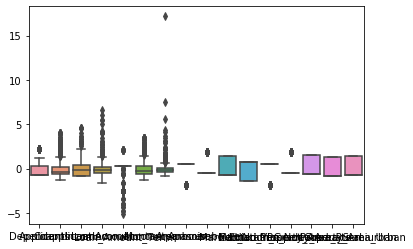

In [1006]:
sns.boxplot(data = X_scaled)

In [1007]:

# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
 
# réduction d'échelle
data_PCA = pd.DataFrame(scale(X),columns=X.columns)
# composantes principales
C = pca.fit(data_PCA).transform(data_PCA)
C

array([[-6.26232750e-01, -2.18683442e+00,  8.06158507e-01, ...,
        -1.66533454e-16, -2.22044605e-16, -3.33066907e-16],
       [ 3.24149748e-01,  2.59662633e-02, -1.12586773e+00, ...,
        -2.77555756e-17,  0.00000000e+00, -2.77555756e-16],
       [-9.44067347e-01, -3.00782724e-01, -1.09089139e+00, ...,
         2.77555756e-16, -3.33066907e-16, -4.44089210e-16],
       ...,
       [ 1.80539138e+00, -2.44052209e-01, -5.32468289e-01, ...,
         6.17287033e-17, -2.46093543e-16, -4.44735846e-16],
       [ 1.30750544e+00, -4.37499648e-03, -8.95720405e-01, ...,
         6.17287033e-17, -3.01604694e-16, -4.44735846e-16],
       [-1.15769879e+00, -8.04868719e-01,  2.74226449e+00, ...,
        -2.22044605e-16,  2.22044605e-16,  7.77156117e-16]])

On peut voir ici que les premières variables générées concentrent le plus grand poids de données


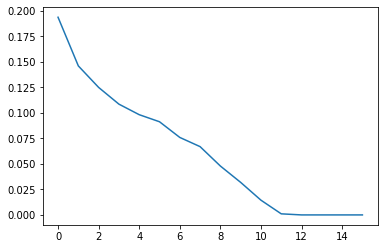

In [1008]:
print("On peut voir ici que les premières variables générées concentrent le plus grand poids de données")
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [1009]:
print("Taux (addition) de valeurs contenues dans les variables PCA 0 et 1:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]))

print("Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]))

Taux (addition) de valeurs contenues dans les variables PCA 0 et 1: 0.3394221884445573
Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2: 0.4642573859151438


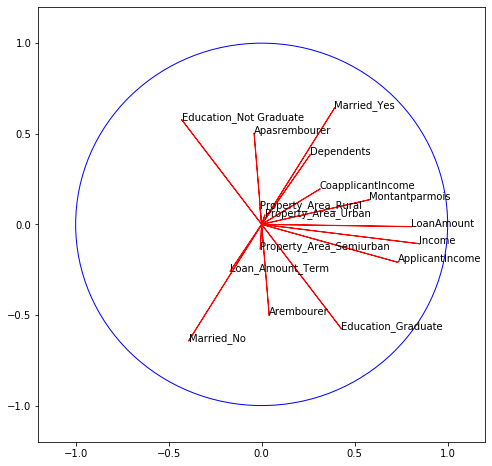

In [1010]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_PCA.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

In [1011]:
df_pcs=pca.transform(data_PCA)

In [1012]:
df_pcs

array([[-6.26232750e-01, -2.18683442e+00,  8.06158507e-01, ...,
        -1.66533454e-16, -2.22044605e-16, -3.33066907e-16],
       [ 3.24149748e-01,  2.59662633e-02, -1.12586773e+00, ...,
        -2.77555756e-17,  0.00000000e+00, -2.77555756e-16],
       [-9.44067347e-01, -3.00782724e-01, -1.09089139e+00, ...,
         2.77555756e-16, -3.33066907e-16, -4.44089210e-16],
       ...,
       [ 1.80539138e+00, -2.44052209e-01, -5.32468289e-01, ...,
         6.17287033e-17, -2.46093543e-16, -4.44735846e-16],
       [ 1.30750544e+00, -4.37499648e-03, -8.95720405e-01, ...,
         6.17287033e-17, -3.01604694e-16, -4.44735846e-16],
       [-1.15769879e+00, -8.04868719e-01,  2.74226449e+00, ...,
        -2.22044605e-16,  2.22044605e-16,  7.77156117e-16]])

In [1013]:
#X = X_scaled
y = df_demise["Loan_Status"]

In [1014]:
y_train

90     1
532    0
485    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 490, dtype: int64

In [1015]:
y_train.value_counts()

1    331
0    159
Name: Loan_Status, dtype: int64

In [1016]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1017]:
#rus = RandomUnderSampler()
#X_train, y_train = rus.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(X_train))

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
X_train, y_train = ros.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(X_train))

In [1018]:
y_test.value_counts()

1    91
0    32
Name: Loan_Status, dtype: int64

In [1019]:
y_train.value_counts()

1    331
0    159
Name: Loan_Status, dtype: int64

In [1020]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.74      1.00      0.85        91

    accuracy                           0.74       123
   macro avg       0.37      0.50      0.43       123
weighted avg       0.55      0.74      0.63       123



In [1021]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dtr=dtree.fit(X_train, y_train)
dtrpred = dtree.predict(X_test)
print(classification_report(y_test,dtrpred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        32
           1       0.80      0.81      0.80        91

    accuracy                           0.71       123
   macro avg       0.61      0.61      0.61       123
weighted avg       0.70      0.71      0.70       123



In [1022]:
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, y_train)
KNeighborsClassifierpred = knncla.predict(X_test)

In [1023]:
print(classification_report(y_test,KNeighborsClassifierpred))

              precision    recall  f1-score   support

           0       0.28      0.22      0.25        32
           1       0.74      0.80      0.77        91

    accuracy                           0.65       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.62      0.65      0.64       123



In [1024]:
random_forest_classifier = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=4),RandomForestClassifier(random_state=0))
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

In [1025]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



In [1026]:
regressionlogistique = LogisticRegression(solver = 'liblinear')
regressionlogistique.fit(X_train, y_train)

regressionlogistique_pred = regressionlogistique.predict(X_test)

In [1027]:
print(classification_report(y_test,regressionlogistique_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.74      1.00      0.85        91

    accuracy                           0.74       123
   macro avg       0.37      0.50      0.43       123
weighted avg       0.55      0.74      0.63       123



In [1028]:
XGboostcla = xgb.XGBClassifier()
train_Xgboost = XGboostcla.fit(X_train, y_train)
predgbcla = train_Xgboost.predict(X_test)
print(classification_report(y_test,predgbcla))

              precision    recall  f1-score   support

           0       0.45      0.41      0.43        32
           1       0.80      0.82      0.81        91

    accuracy                           0.72       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.71      0.72      0.71       123



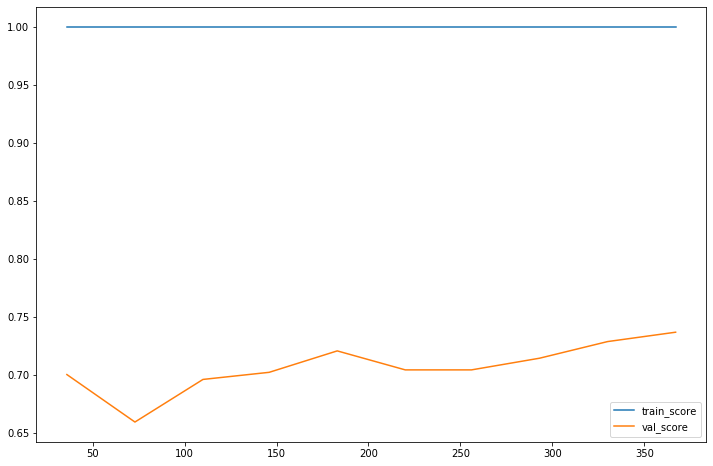

In [1029]:
N, train_score,val_score = learning_curve(XGboostcla, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'accuracy')
plt.figure(figsize=(12,8))

plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

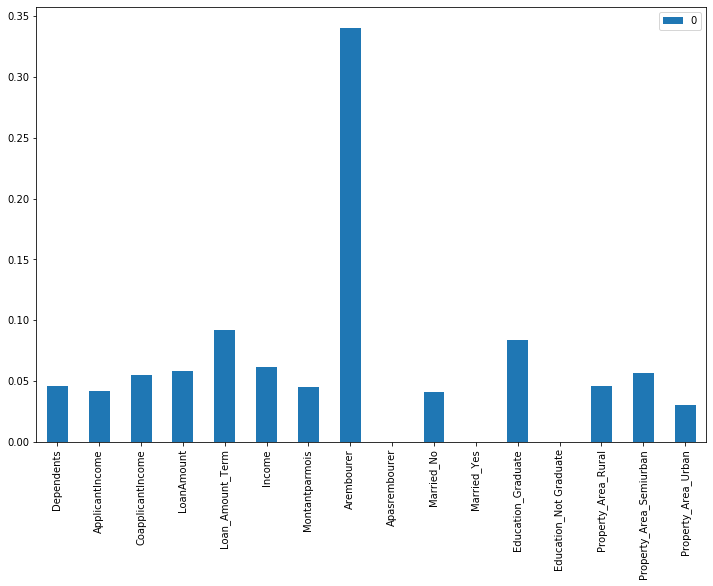

In [1030]:
pd.DataFrame(XGboostcla.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

In [1031]:
pd.DataFrame(random_forest_classifier.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

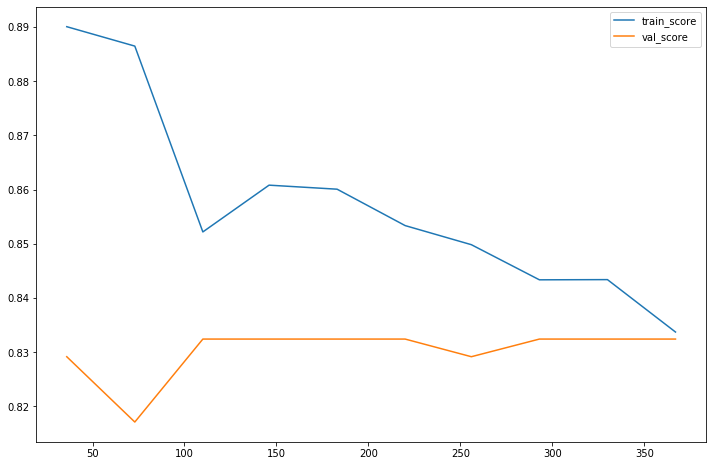

In [1032]:
N, train_score,val_score = learning_curve(random_forest_classifier, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

In [1033]:
def evaluate(model):
    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    N, train_score,val_score = learning_curve(model, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train_score')
    plt.plot(N, val_score.mean(axis=1),label='val_score')
    plt.title(f'{name}')
    plt.legend()
    plt.show()

    print("\n____________________________________________________________________________________\n")

In [1034]:
Pipe = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=4))

In [1035]:
random_forest_classifier = make_pipeline(Pipe, RandomForestClassifier(random_state=0))
adaboost = make_pipeline(Pipe, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(Pipe,StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(Pipe,StandardScaler(),KNeighborsClassifier())
regressionlogistique = make_pipeline(Pipe, LogisticRegression(solver = 'liblinear'))
dtree = make_pipeline(Pipe, tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0))
XGboostcla = make_pipeline(Pipe,xgb.XGBClassifier())

In [1036]:
models_pipe = { 'random_forest_classifier' : random_forest_classifier,
               'adaboost' : adaboost,
               'SVM' : SVM,
               'KNN' : KNN,
               'regressionlogistique' : regressionlogistique,
               'dtree' : dtree,
               'XGboostcla' : XGboostcla}

random_forest_classifier
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



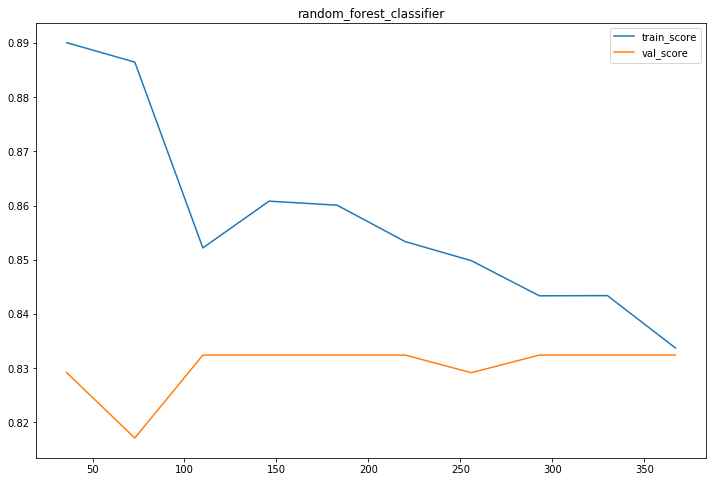


____________________________________________________________________________________

adaboost
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



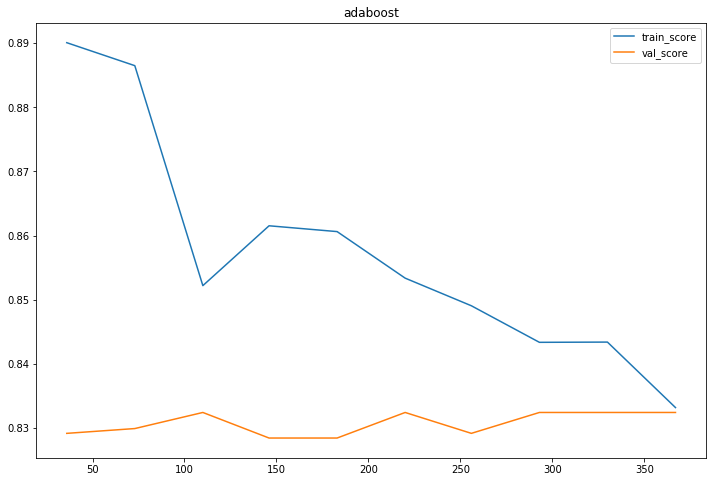


____________________________________________________________________________________

SVM
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



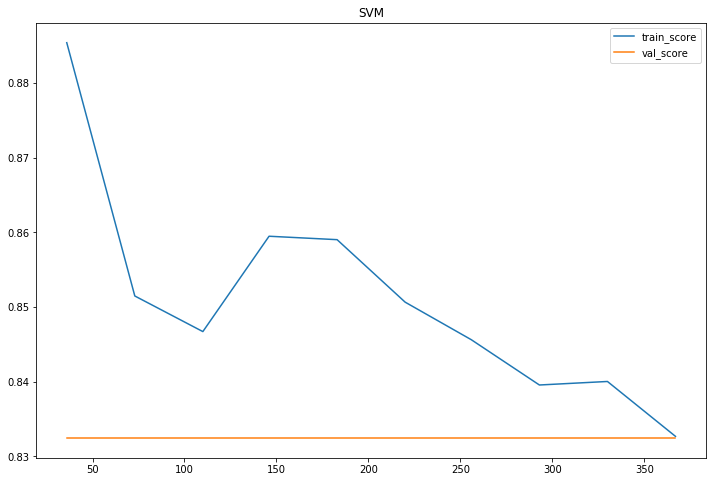


____________________________________________________________________________________

KNN
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



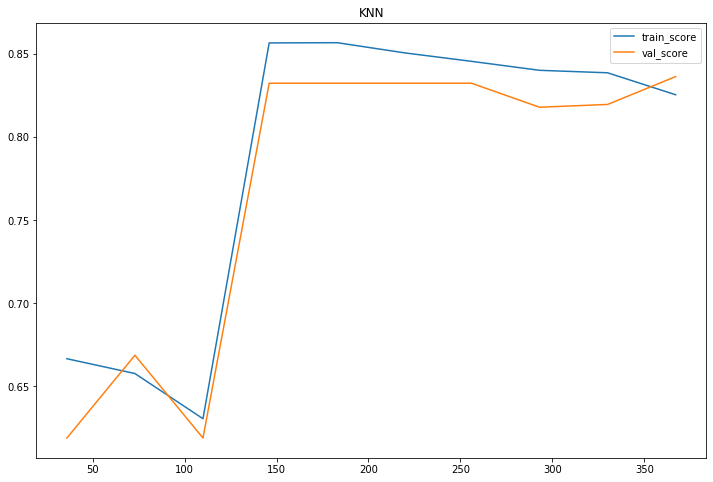


____________________________________________________________________________________

regressionlogistique
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



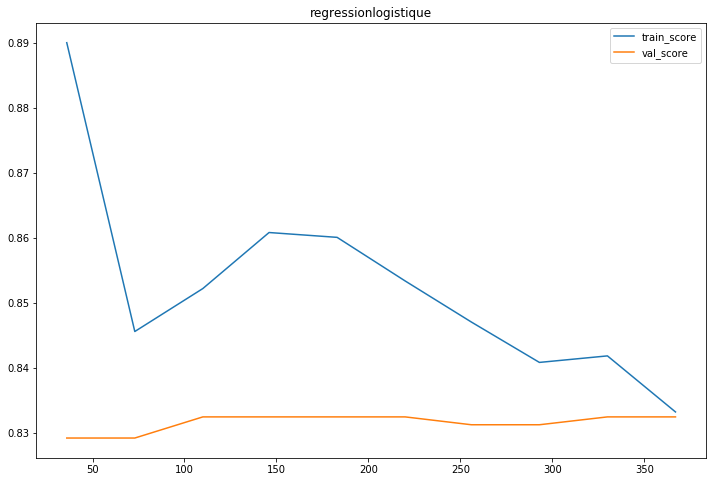


____________________________________________________________________________________

dtree
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



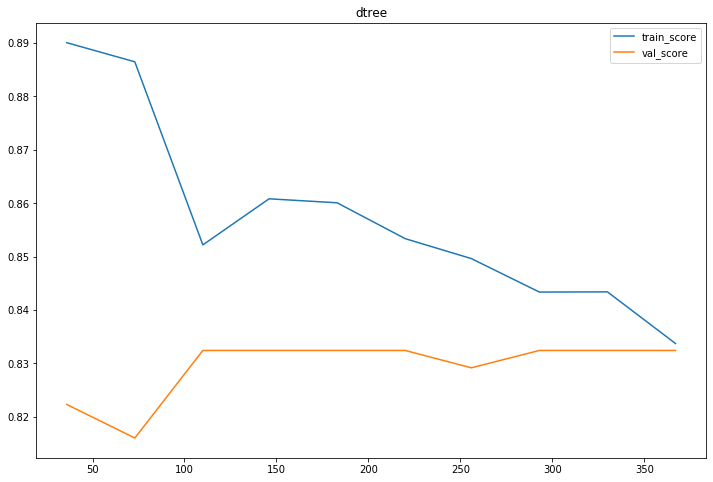


____________________________________________________________________________________

XGboostcla
[[16 16]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



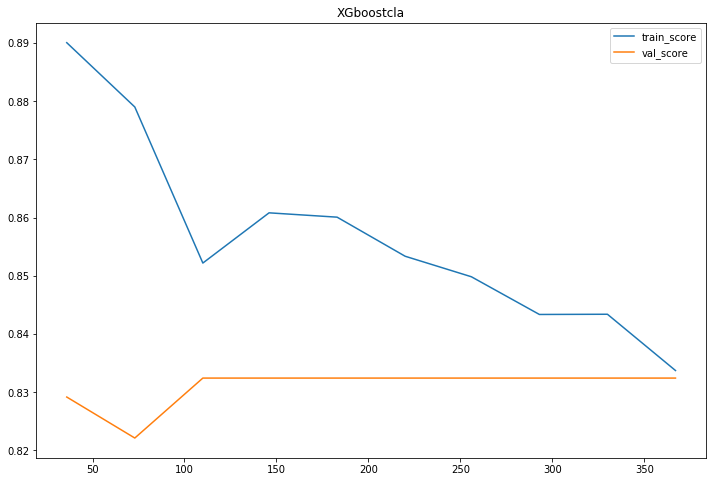


____________________________________________________________________________________



In [1037]:
for name,model in models_pipe.items() : 
    print(name)
    evaluate(model)


In [1038]:
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=4))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=4),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__order': 'C',
 'pipeline__se

In [1039]:
params = {'svc__gamma':[1e-3, 1e-4],
          'svc__C':[1.0,10.0,100.0,1000.0],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

In [1040]:
 #        'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],

In [1041]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [1042]:
#grid = GridSearchCV(SVM, params,scoring='accuracy',cv=4)
grid = RandomizedSearchCV(SVM, params,scoring='accuracy',cv=4,n_iter=100)
grid.fit(X_train,y_train)
print(grid.best_params_)

svm_pred = grid.predict(X_test)

print(classification_report(y_test,svm_pred))

{'svc__gamma': 0.001, 'svc__C': 100.0, 'pipeline__selectkbest__k': 15, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.84      0.93      0.89        91

    accuracy                           0.82       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.81      0.82      0.81       123



In [1043]:
precision,recall,threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

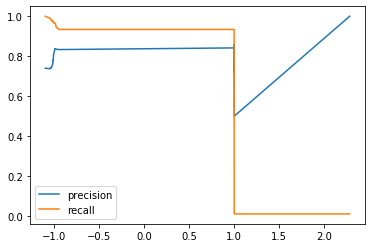

In [1044]:
plt.plot(threshold,precision[:-1], label="precision")
plt.plot(threshold,recall[:-1], label="recall")
plt.legend()

In [1045]:
def final(model,X,treshold=0):
    return model.decision_function(X) > treshold

In [1046]:
f_pred = final(grid.best_estimator_,X_test,treshold=0.99)

In [1047]:
f1_score(y_test,f_pred)

0.8854166666666666

In [1048]:
recall_score(y_test,f_pred)

0.9340659340659341

In [1049]:
print(classification_report(y_test,f_pred))

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.84      0.93      0.89        91

    accuracy                           0.82       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.81      0.82      0.81       123



In [1050]:
XGboostcla.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('xgbclassifier',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'xgbclassifier': XGBCla

In [1051]:
paramsXGB = {
          'xgbclassifier__gamma' : [0],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

In [1052]:
#grid = GridSearchCV(SVM, params,scoring='accuracy',cv=4)
grid = RandomizedSearchCV(XGboostcla, paramsXGB,scoring='accuracy',cv=4,n_iter=100)
grid.fit(X_train,y_train)
print(grid.best_params_)

xg_pred = grid.predict(X_test)

print(classification_report(y_test,xg_pred))

{'xgbclassifier__gamma': 0, 'pipeline__selectkbest__k': 2, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.84      0.92      0.88        91

    accuracy                           0.81       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123

